author：@JG Ding

## 参考文档

[时刻更新笔记]( https://github.com/JIagengDing/Julia/blob/master/JuliaNotes.ipynb )

[文档]( https://docs.julialang.org/ )

[中文文档]( https://docs.juliacn.com )

[pkg镜像服务]( https://discourse.juliacn.com/t/topic/2969 )



# 一、简介

一群拥有各种语言丰富编程经验的MATLAB高级用户，对现有的科学计算编程工具感到不满——这些软件对自己专长的领域表现得非常棒，但在其它领域却非常糟糕。

他们想要的是一个**开源**的软件:

* 它要像C语言一般***快速***而又拥有如同Ruby的***动态性***；

* 要具有Lisp般真正的同像性（Homoiconicity) 而又有Matlab般***熟悉的数学记号***；

* 要像Python般***易用***、像R般在***统计分析***上得心应手；

* 像MATLAB般具有强大的***线性代数运算能力***、像shell般胶水语言的能力;

* 还有，它应该是交互式的，同时又是编译型的……

    
## Julia 的优点：

* 采用 MIT 许可证：免费又开源
* 核心语言很小：标准库是用 Julia 自身写的，包括整数运算这样的基础运算
* 丰富的基础类型：既可用于定义和描述对象，也可用于做可选的类型标注
* 支持Unicode, 包括但不限于UTF-8
* 接近 C 语言的性能


![运行速度]( https://julialang.org/assets/benchmarks/benchmarks.svg )


In [60]:
#import Pkg
#Pkg.add("Plots")
#pkg.add("SymPy")
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")
#Pkg.add("ImplicitEquations")

# 二、变量

## 实数和字符串

In [47]:
a = 0
println(a)

println(typeof(a))

0
Int64


In [48]:
b = "Str"
println(b)

println(typeof(b))

Str
String


In [12]:
啊 = 0
println(啊)

println(typeof(啊))

0
Int64


In [49]:
#\alpha[tab]
α = 0


0

## 复数

In [15]:
x = 1 + 3im
println("x is: ", x)

y = (1 + 3im) * (1 + 3im)
println("y is: ", y)

# 优先级
println(isequal(3/2im, 3/2*im))

x is: 1 + 3im
y is: -8 + 6im
false


In [18]:
# 字面量函数
println(one(x))
println(zero(x))

1 + 0im
0 + 0im


## 基本运算符

In [36]:
x = 5.0; y = -3


x + y

x - y

x * y

3x

x / y

x^y

sqrt(x)

## 分数
println(2//3, "\t", 6//9)

## 整除
x ÷ y
println("x ÷ y = $(x ÷ y)")

## 取余
x % y
println("x % y = $(x % y)")

## 取模
mod(x, y)
println("mod(x, y) = $(mod(x, y))")

2//3	2//3
x ÷ y = -1.0
x % y = 2.0
mod(x, y) = -1.0


## 向量化运算

Julia 中，每个二元运算符都有一个 dot 运算符与之对应。例如 `^ `就有对应的 `.^` 存在，`a .^ b` 被解析为 dot 调用 `(^).(a,b)`，这会执行 broadcast 操作。

例如，在计算表达式  `A.^2 .+ sin.(A)` 时，Julia 只对 A 进行做一次循环，遍历 A 中的每个元素 a 并计算 `a^2 + sin(a)`。

In [24]:
A  = [1,2,3,4,5]

z  = A.^2 .+ sin.(A)
zz = @. A^2 + sin(A)

isequal(z, zz)

true

## 数值比较

In [50]:
x == y

x != y
x ≠ y

x<y

x <= y

z = -5
x > y > z

false

In [27]:
# NaN 不等于、不小于且不大于任何数值，包括它自己

NaN == NaN

false

In [28]:
isequal(NaN, NaN)

true

## 几个特殊的函数

In [51]:
x = 10; y = 100


cbrt(x)

hypot(x, y)

log(x)

log2(x)

log(y,x)

log1p(x)  # 当 x接近 0 时的 log(1+x) 的精确值

exp(x)

expm1(x)  # 当 x 接近 0 时的 exp(x)-1 的精确值


22025.465794806718

## 三、函数

函数返回的值是最后计算的表达式的值，默认情况下，它是函数定义主体中的最后一个表达式。

In [53]:
function f(x,y)
    return x * y
    x + y
end

f(x, y)

1000

In [54]:
g(x,y) = x + y

g(x, y)

110

In [48]:
Σ = f

Σ(x,y)

110

## 返回指定类型

In [51]:
function h(x, y)::Int8
    return x * y
end


hh = h(2,3)
println(hh)
println(typeof(hh))

6
Int8


## 匿名函数

不带函数名称地匿名创建的函数

In [52]:
x -> x^2 + 2x - 1

#3 (generic function with 1 method)

In [53]:
map(x -> x^2 + 2x - 1, [1, 3, -1])

3-element Array{Int64,1}:
  2
 14
 -2

# 四、元组和数组

## 元组

 一个元组是一个固定长度的容器，可以容纳任何值，但不可以被修改(是immutable的)。

In [57]:
x = (1,2,"hello")

(1, 2, "hello")

In [58]:
x[1]


1

In [58]:
## named tuple

x = (a=1, b=1+2)

(a = 1, b = 3)

In [59]:
x.b

3

## 数组

函数 | 描述
:--: | :--:
eltype(A)|A 中元素的类型
length(A)|A 中元素的数量
ndims(A)|A 的维数
size(A)|一个包含 A 各个维度上元素数量的元组
size(A,n)|A 第 n 维中的元素数量
axes(A)|一个包含 A 有效索引的元组
axes(A,n)|第 n 维有效索引的范围
eachindex(A)|一个访问 A 中每一个位置的高效迭代器
stride(A,k)|在第 k 维上的间隔（stride）（相邻元素间的线性索引距离）
strides(A)|包含每一维上的间隔（stride）的元组

In [64]:
ones(Int,2,3)

2×3 Array{Int64,2}:
 1  1  1
 1  1  1

In [66]:
a = [1:3;
     4:5;
     6]

b = [1:3
     4:5
     6]

a == b

true

In [67]:
c = [[1,2] [4,5] [7,8]]

2×3 Array{Int64,2}:
 1  4  7
 2  5  8

In [70]:
d = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

### Comprehensions

`A = [ F(x,y,...) for x=rx, y=ry, ... ]`

这种形式的含义是 F(x,y,...) 取其给定列表中变量 x，y 等的每个值进行计算。

In [72]:
x = rand(8)

8-element Array{Float64,1}:
 0.08297496019384609
 0.16408312500192834
 0.9821922957497968
 0.9877271426603309
 0.38412309315563764
 0.34155236939425815
 0.2358456831703455
 0.27709557848328803

In [74]:

[ 0.25*x[i-1] + 0.5*x[i] + 0.25*x[i+1] for i=2:length(x)-1 ]


6-element Array{Float64,1}:
 0.3483333764868749
 0.7790487147904632
 0.8354424185565241
 0.5243814245914661
 0.32576837877862486
 0.2725848285545593

In [76]:
Float32[ 0.25*x[i-1] + 0.5*x[i] + 0.25*x[i+1] for i=2:length(x)-1 ]

6-element Array{Float32,1}:
 0.3483334
 0.77904874
 0.8354424
 0.5243814
 0.32576838
 0.27258483

### Generator Expressions

例如，以下表达式在不分配内存的情况下对一个序列进行求和：

In [59]:
sum(1/n^2 for n=1:1000)

1.6439345666815615

In [81]:
# for 后面所有逗号分隔的表达式都被解释为范围。
map(tuple, (1/(i+j) for i=1:2, j=1:2), [1:4;])

4-element Array{Tuple{Float64,Int64},1}:
 (0.5, 1)
 (0.3333333333333333, 2)
 (0.3333333333333333, 3)
 (0.25, 4)

In [82]:
# 使用多个for
[(i,j) for i=1:3 for j=1:i]

6-element Array{Tuple{Int64,Int64},1}:
 (1, 1)
 (2, 1)
 (2, 2)
 (3, 1)
 (3, 2)
 (3, 3)

In [83]:
# for & if
[(i,j) for i=1:3 for j=1:i if i+j == 4]

2-element Array{Tuple{Int64,Int64},1}:
 (2, 2)
 (3, 1)

# 五、类型

`::` 运算符可以用来在程序中给表达式和变量附加类型注释。

当被附加到一个计算值的表达式时，`::` 操作符读作「是······的实例」。

In [88]:
a = (1 + 2)::Int
typeof(a)

Int64

In [90]:
function foo()
    x::Int8 = 100
    x
end

b = foo()
typeof(b)

Int8

## Composite Types

使用 `struct` 声明的对象都是不可变的，它们在构造后无法修改。

In [61]:
struct Cat
    name::String
    age::Int
end

In [62]:
new = Cat("Tom", 10)

Cat("Tom", 10)

In [63]:
new.age 

10

## mutable struct

In [64]:
mutable struct Dog
    name::String
    age::Int
end

In [65]:
d = Dog("Spike", 9)

Dog("Spike", 9)

In [42]:
d.age = 8
d.age

8

# 六、方法

对于**一个函数**的**一个可能行为**的定义叫做方法。之前我们只展示了那些只定了一个方法的，对参数的所有类型都适用的函数。

为了解释清楚**方法**的概念，不得不提**分派**和**多重分派**:

* 当一个函数被应用时执行方法的选择被称为**分派**。

* 使用函数的所有参数，而非只用第一个，来决定调用哪个方法被称为**多重分派**。


多重分派和灵活的参数类型系统让Julia有能力抽象地表达高层级算法，而与实现细节解耦，也能生成高效而专用的代码来在运行中处理每个情况。

In [66]:
ff(x::Float64, y::Float64) = 2x + y

ff (generic function with 1 method)

In [67]:
ff(x::Number, y::Number) = 2x - y

ff (generic function with 2 methods)

In [68]:
ff(1.0, 2.0)

4.0

In [69]:
ff(1, 2.0)

0.0

In [70]:
methods(ff)

# 2 methods for generic function "ff":
[1] ff(x::Float64, y::Float64) in Main at In[66]:1
[2] ff(x::Number, y::Number) in Main at In[67]:1

# 应用

## 绘图

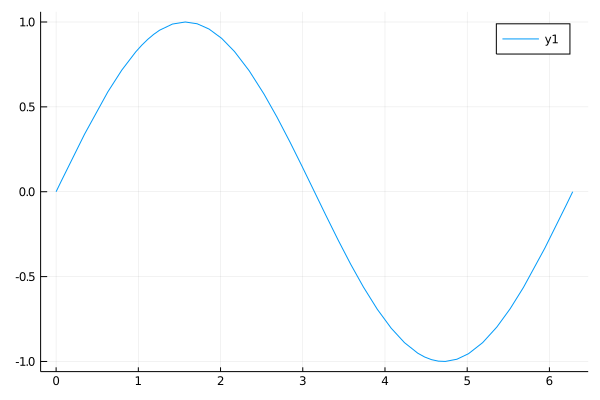

In [17]:
using Plots
plot(sin, 0, 2pi)

参数	| 描述
:--: | :--:
legend	| 轴名称
aspect_ratio |	Use :equal to have x and y axis have same scale
linewidth |	曲线宽度，大于1
color	| 曲线颜色（e.g.，:red, :green)

## 极限

In [37]:
using SymPy

@vars x h real=true
limit((sin(x+h) - sin(x))/ h, h, 0)

cos(x)

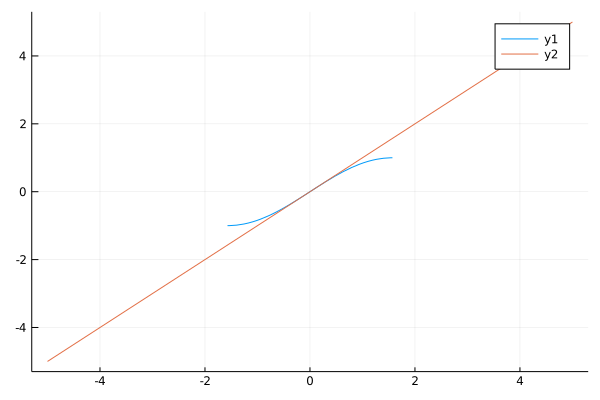

In [11]:
using Plots

f(x) = sin(x)
c = 0
tl(x) = f(c) + 1 * (x - c)
plot(f, -pi/2, pi/2)
plot!(tl)

## 导数

In [71]:
a, x = symbols("a, x")

f(x) = sin(x)
diff(f(x),x)

cos(x)

In [17]:
subs(diff(f(x),x), x=>pi)

-1

## 定积分和不定积分

In [73]:
# 梯形法
@vars x
f(x) = sin(x)
a, b = 0, pi

n = 10^5
m = (b - a)/n

xi = a+m/2 : m : b-m/2
S = sum(f(xi[i]) * m for i in 1:n-1)


1.9999999995887554

In [74]:
# 不定积分

F = integrate(sin(x), x)
real_S = F(b) - F(a)

2

In [38]:
# 旋转体体积
# 曲线 x^2 + y^2 = r^2 绕y轴旋转一周的体积
@vars x y r real=true 

X = sqrt(r^2 - y^2)
integrate(pi*X^2, (y, -r, r))

     3
4⋅π⋅r 
──────
  3   